# EXPERIMENTAL PROJECTS: muffin vs chihuaha
Use Keras to train a neural network for the binary classification of muffins and Chihuahuas based on images from this dataset.

Images must be transformed from JPG to RGB (or grayscale) pixel values and scaled down. The student is asked to:

* experiment with different network architectures (at least 3) and training hyperparameters,
* use 5-fold cross validation to compute your risk estimates,
* thoroughly discuss the obtained results, documenting the influence of the choice of the network architecture and the tuning of the hyperparameters on the final cross-validated risk estimate.

While the training loss can be chosen freely, the reported cross-validated estimates must be computed according to the zero-one loss.


Download data from [link images](https://https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification).


## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from model import *
from util import *

In [2]:
train_dir = "data/train/"
test_dir = "data/test/"

BATCH_SIZE = 32
IMG_SIZE= 128

In [3]:
trainDataGen = ImageDataGenerator(
    rotation_range=90,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range = [0.5, 1.5],
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1/255
)

testDataGen=ImageDataGenerator(
    rescale=1/255
)

## MODELS AND TRAINING

*  Multi Layers Perpectron (MLP)
* Convolutional Neural Network:
  * LeNet5
  * CNN custom
  * AlexNet
  * VGG16
  * ResNet50

All the models will be training with standard hyperparameter and tuned one.

### MLP

Found 4733 files belonging to 2 classes.
The classes name are:['chihuahua', 'muffin']
Number of training batches: 148


100%|████████████████████████████████████████████████████████████████████████████████| 148/148 [00:02<00:00, 50.84it/s]


Shape of train_images: (4733, 128, 128, 3)
Shape of train_labels: (4733,)
You choose MLP to train without tuning.
Training Fold 1...
Hyper parameters: 1{'dropout_1': 0.5, 'units': 256, 'dropout_2': 0.5, 'learning_rate': 0.001}
Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 49152)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               6291584   
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                  

Epoch 4/30
95/95 [==============================] - 7s 77ms/step - loss: 0.6873 - accuracy: 0.5574 - val_loss: 0.6968 - val_accuracy: 0.5127
Epoch 5/30
95/95 [==============================] - 7s 78ms/step - loss: 0.6863 - accuracy: 0.5577 - val_loss: 0.6972 - val_accuracy: 0.5127
Epoch 6/30
95/95 [==============================] - 7s 77ms/step - loss: 0.6871 - accuracy: 0.5577 - val_loss: 0.6967 - val_accuracy: 0.5127
Epoch 6: early stopping
32/32 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.5127
Training Fold 5...
Hyper parameters: 5{'dropout_1': 0.5, 'units': 256, 'dropout_2': 0.5, 'learning_rate': 0.001}
Epoch 1/30
95/95 [==============================] - 8s 83ms/step - loss: 2.2941 - accuracy: 0.5109 - val_loss: 0.6919 - val_accuracy: 0.5455
Epoch 2/30
95/95 [==============================] - 8s 81ms/step - loss: 0.7005 - accuracy: 0.5405 - val_loss: 0.6905 - val_accuracy: 0.5455
Epoch 3/30
95/95 [==============================] - 7s 78ms/step - loss

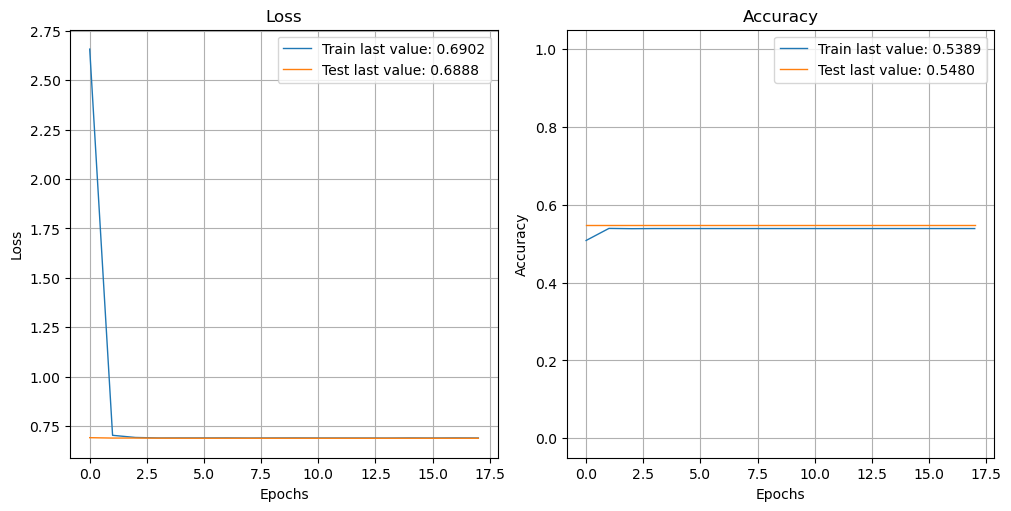

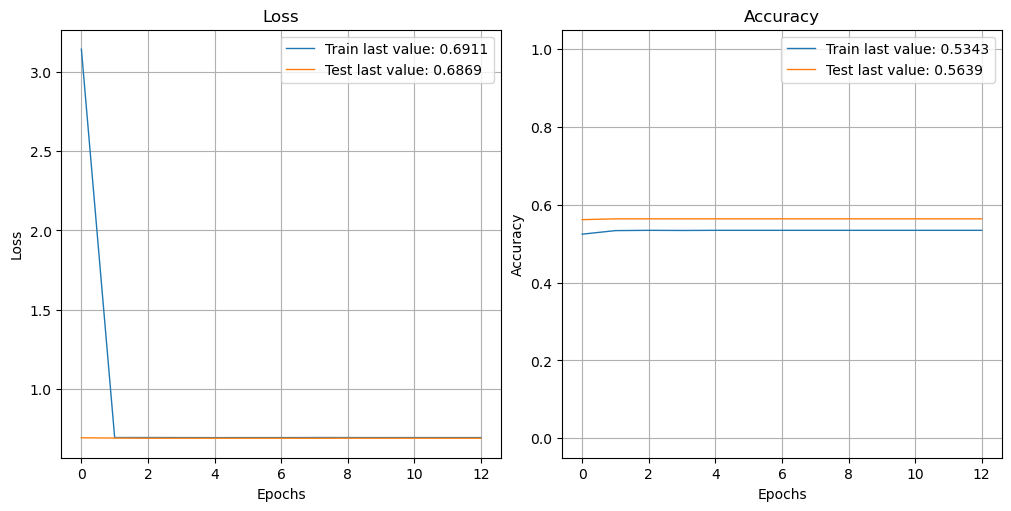

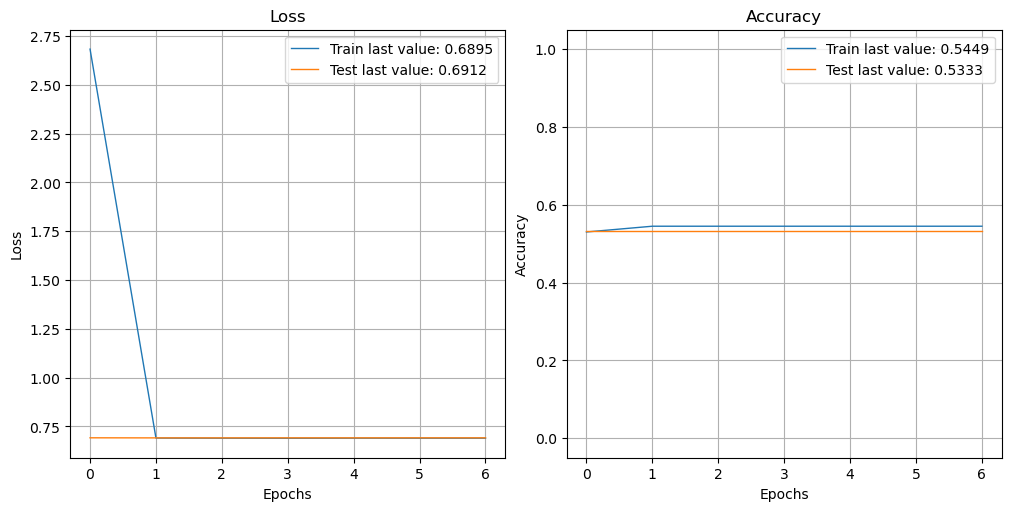

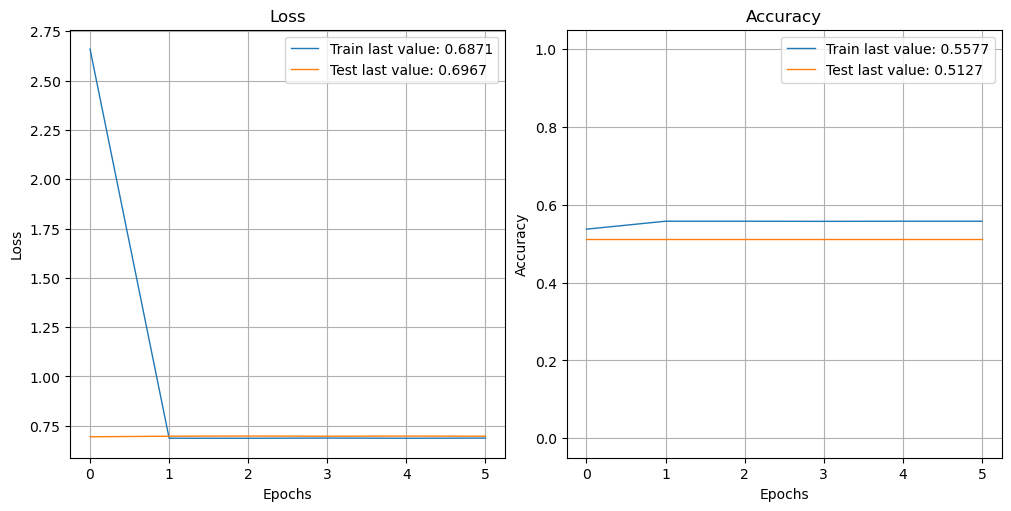

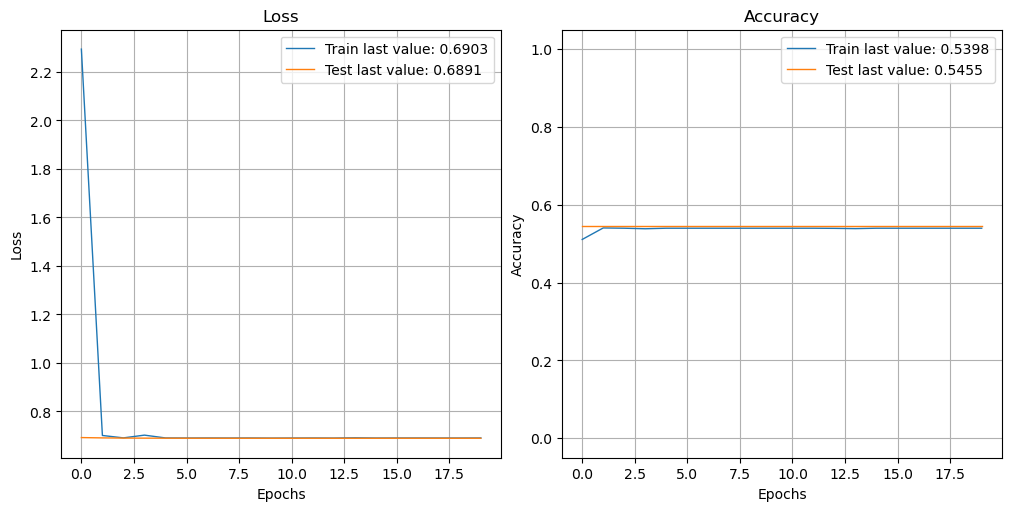

In [4]:
images, labels= import_images(train_dir)

# Without tuning
training(
    model=mlp(images.shape[1],images.shape[3]), 
    train_images=images, 
    train_labels=labels, 
    trainDataGen=trainDataGen, 
    testDataGen=testDataGen
)


Trial 5 Complete [00h 03m 48s]
val_accuracy: 0.6969376802444458

Best val_accuracy So Far: 0.6969376802444458
Total elapsed time: 00h 10m 14s
Hyper parameters: {'dropout_1': 0.2, 'units': 32, 'dropout_2': 0.0, 'learning_rate': 0.0002963442135421521}
Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               6291584   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
           

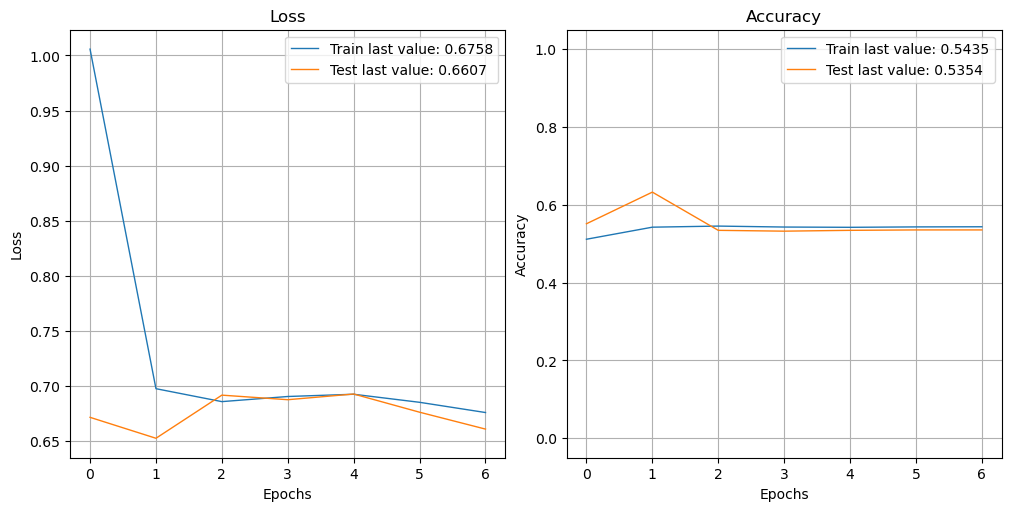

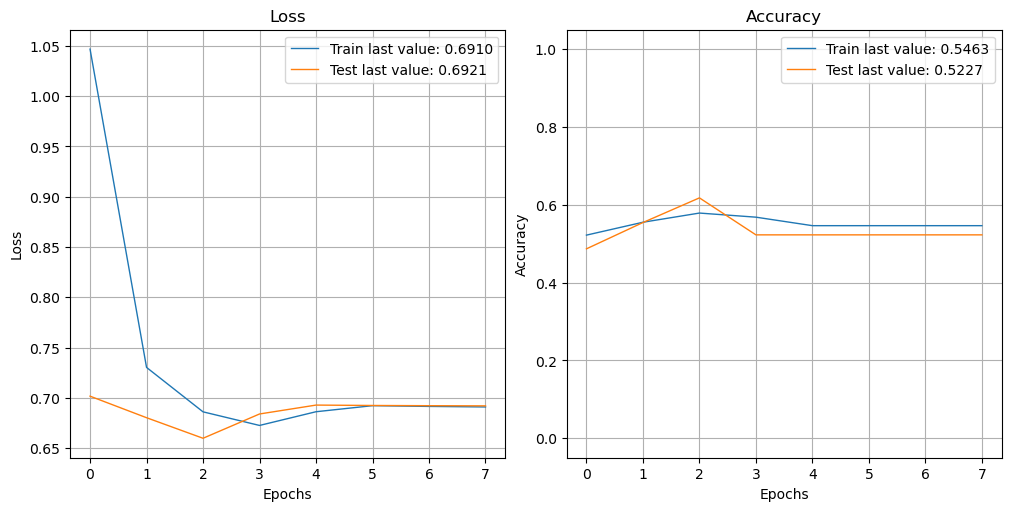

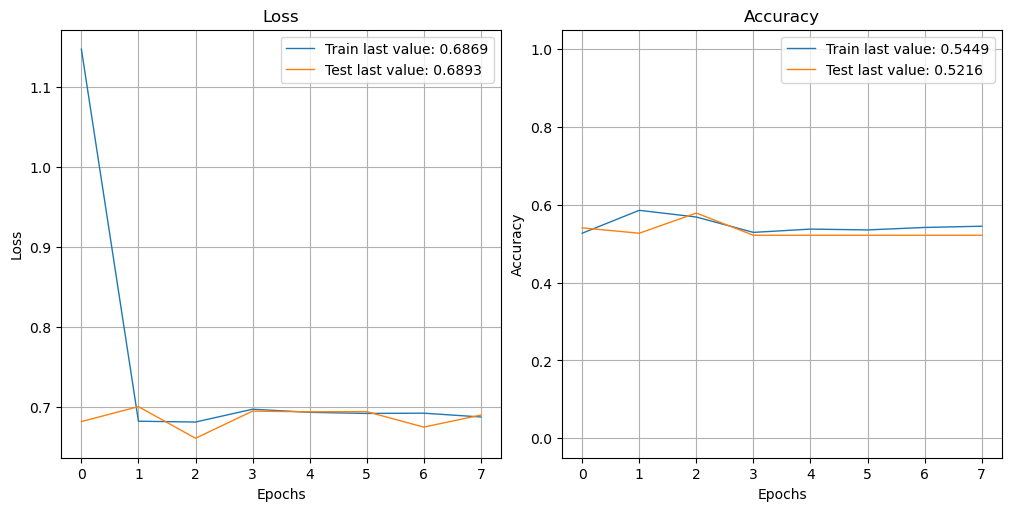

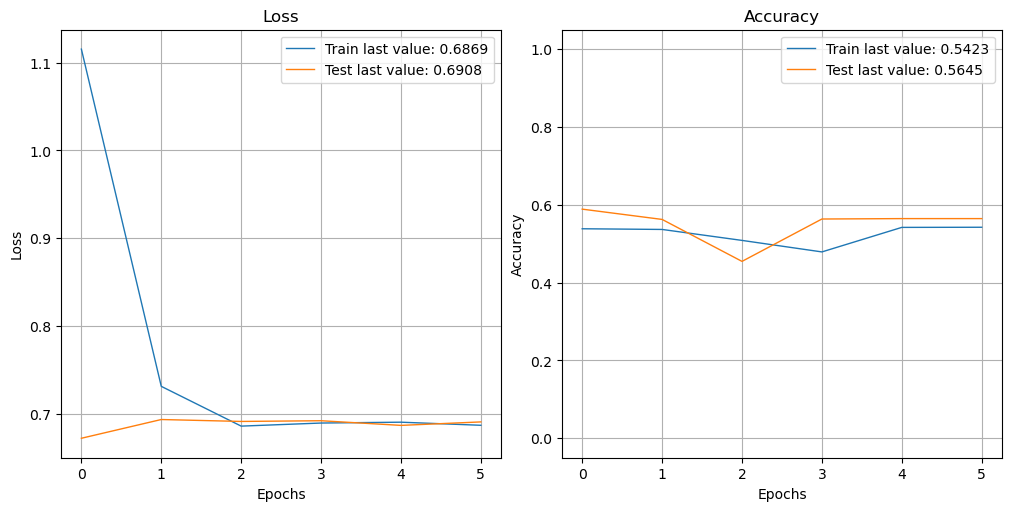

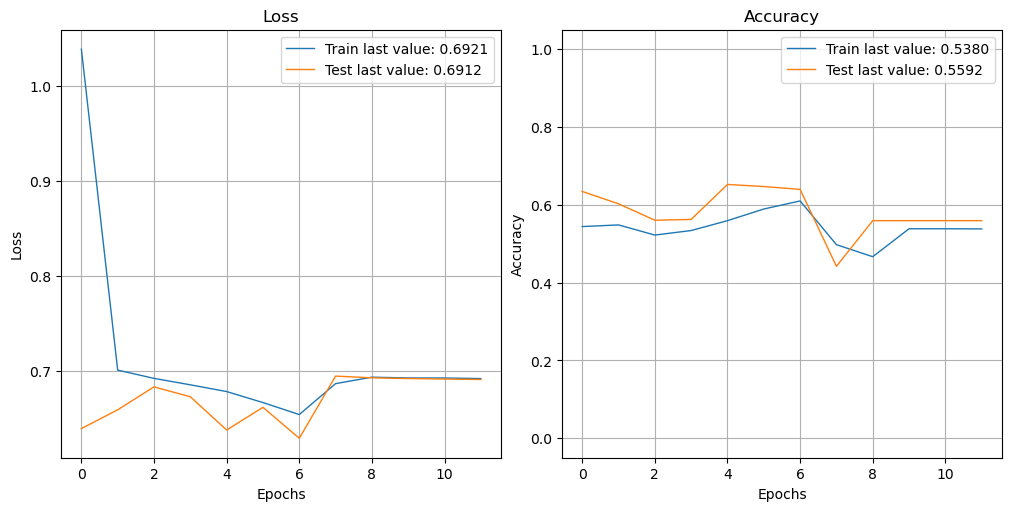

In [5]:
# With tuning
training(
    model=mlp(images.shape[1],images.shape[3]), 
    train_images=images, 
    train_labels=labels, 
    trainDataGen=trainDataGen, 
    testDataGen=testDataGen,
    tuning=True
)

### LeNet5

Found 4733 files belonging to 2 classes.
The classes name are:['chihuahua', 'muffin']
Number of training batches: 148


100%|████████████████████████████████████████████████████████████████████████████████| 148/148 [00:01<00:00, 79.96it/s]


Shape of train_images: (4733, 32, 32, 1)
Shape of train_labels: (4733,)
You choose LENET5 to train without tuning.
Training Fold 1...
Hyper parameters: 1{'units': 84, 'learning_rate': 0.001}
Model: "leNet5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 

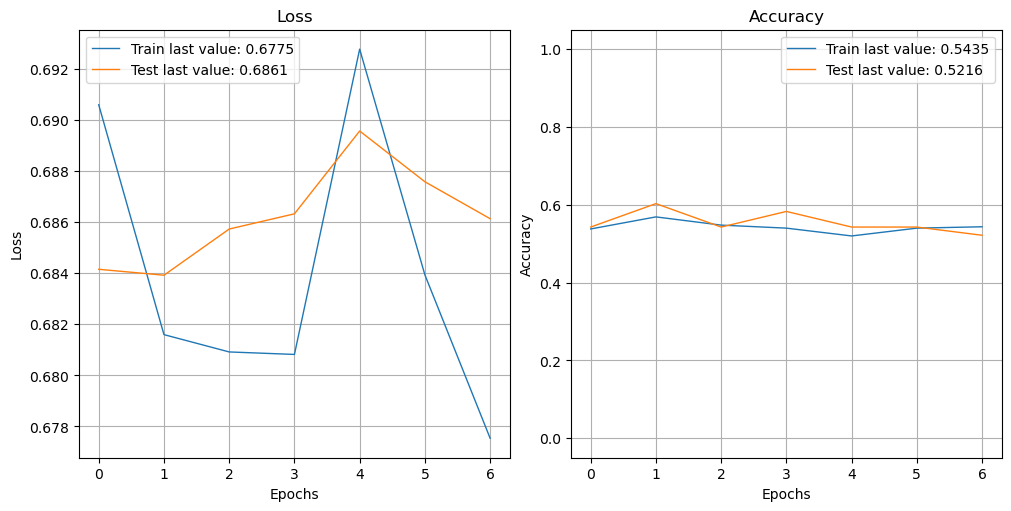

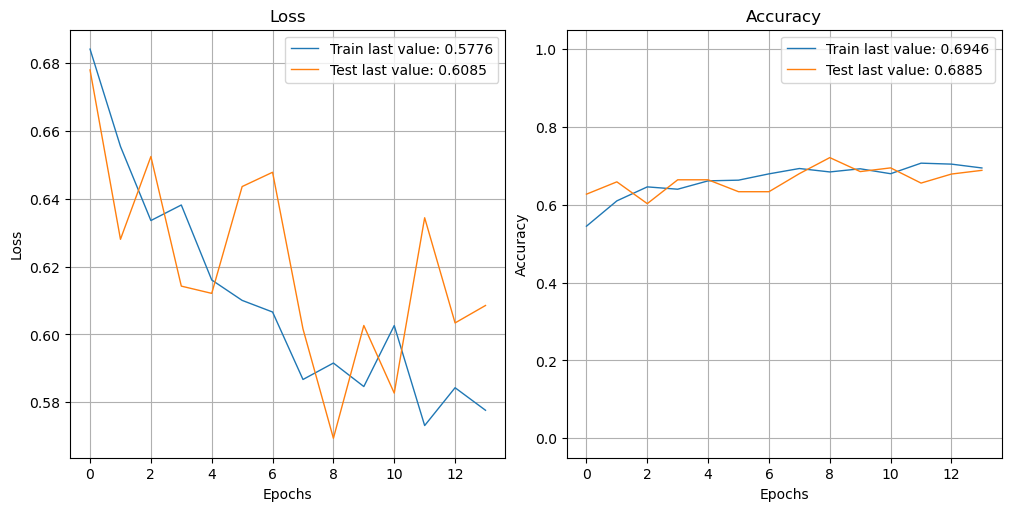

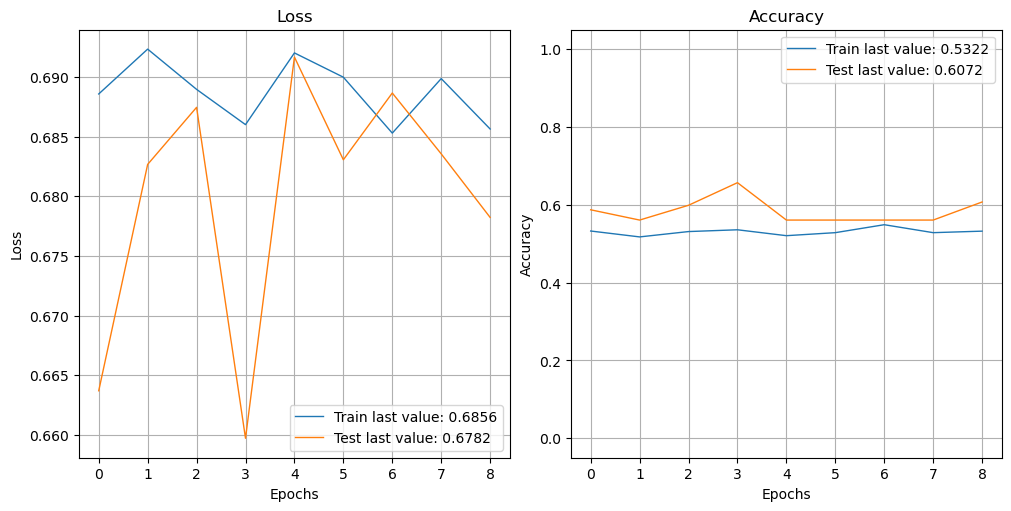

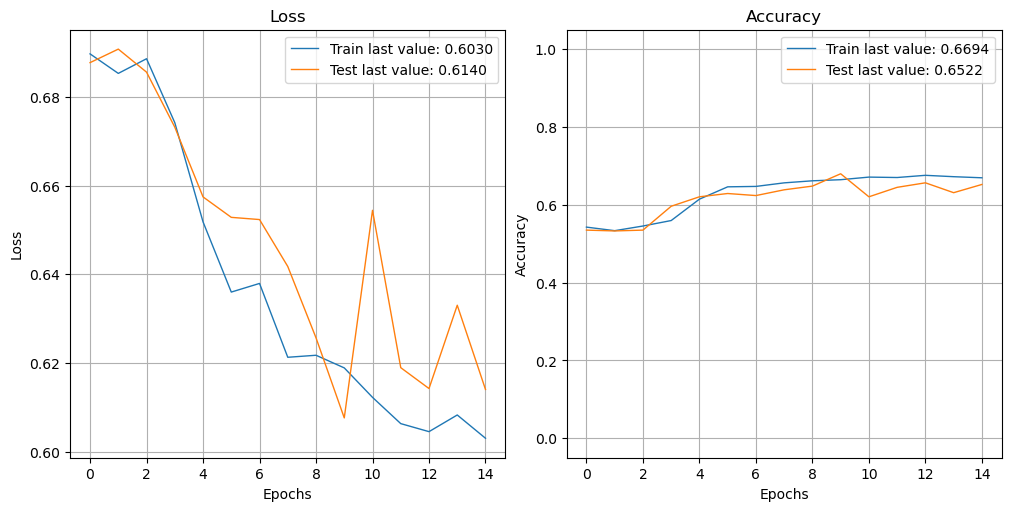

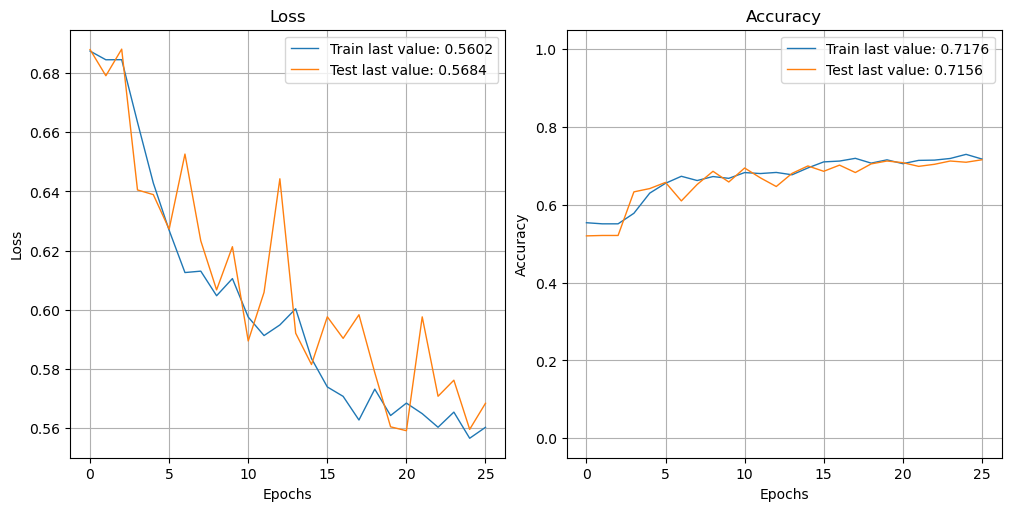

In [8]:
images, labels= import_images(train_dir, 32, "grayscale")

# Without tuning
training(
    model=leNet5(images.shape[1],images.shape[3]), 
    train_images=images, 
    train_labels=labels, 
    trainDataGen=trainDataGen, 
    testDataGen=testDataGen
)

Trial 5 Complete [00h 00m 23s]
val_accuracy: 0.6895459294319153

Best val_accuracy So Far: 0.7117212414741516
Total elapsed time: 00h 01m 27s
Hyper parameters: {'units': 64, 'learning_rate': 0.00013161121798180208}
Model: "leNet5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                           

95/95 [==============================] - 1s 12ms/step - loss: 0.6874 - accuracy: 0.5489 - val_loss: 0.6845 - val_accuracy: 0.5338
Epoch 2/30
95/95 [==============================] - 1s 11ms/step - loss: 0.6830 - accuracy: 0.5489 - val_loss: 0.6765 - val_accuracy: 0.5338
Epoch 3/30
95/95 [==============================] - 1s 11ms/step - loss: 0.6704 - accuracy: 0.5711 - val_loss: 0.6597 - val_accuracy: 0.6818
Epoch 4/30
95/95 [==============================] - 1s 12ms/step - loss: 0.6538 - accuracy: 0.6165 - val_loss: 0.6697 - val_accuracy: 0.5740
Epoch 5/30
95/95 [==============================] - 1s 12ms/step - loss: 0.6395 - accuracy: 0.6437 - val_loss: 0.6111 - val_accuracy: 0.7051
Epoch 6/30
95/95 [==============================] - 1s 10ms/step - loss: 0.6296 - accuracy: 0.6595 - val_loss: 0.6503 - val_accuracy: 0.6047
Epoch 7/30
95/95 [==============================] - 1s 12ms/step - loss: 0.6154 - accuracy: 0.6546 - val_loss: 0.6073 - val_accuracy: 0.6956
Epoch 8/30
95/95 [======

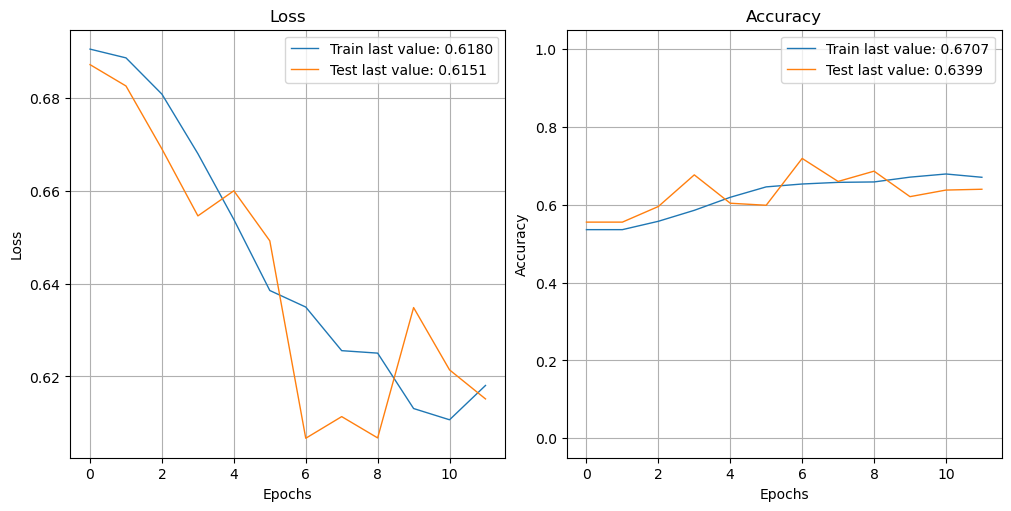

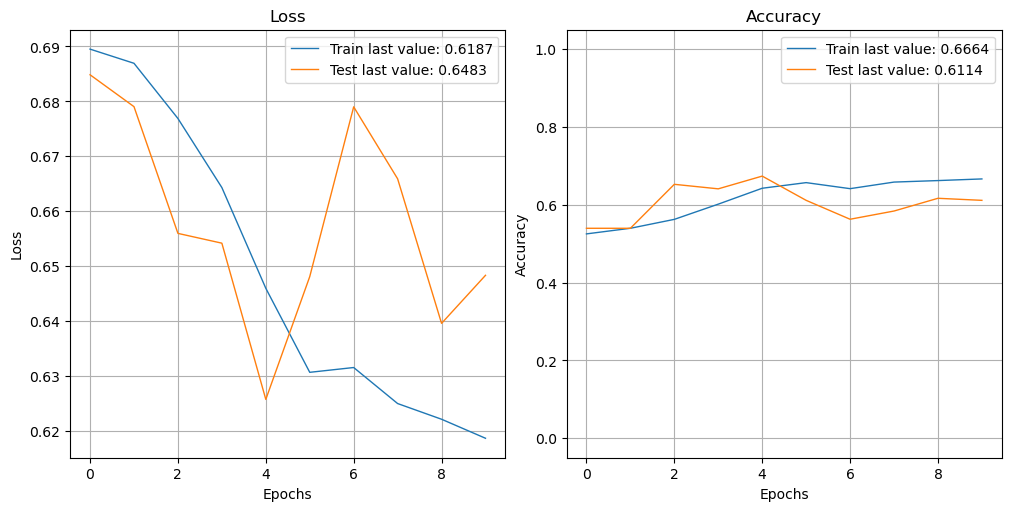

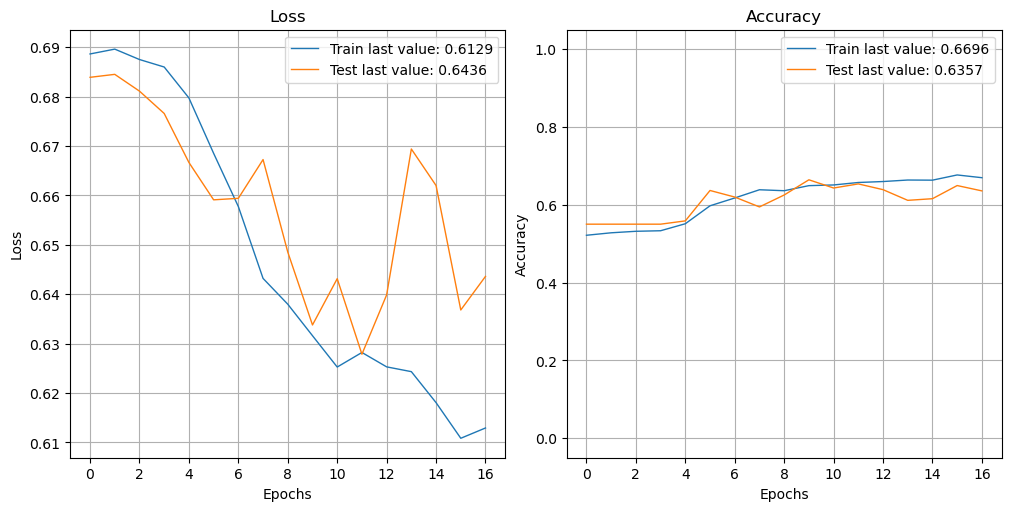

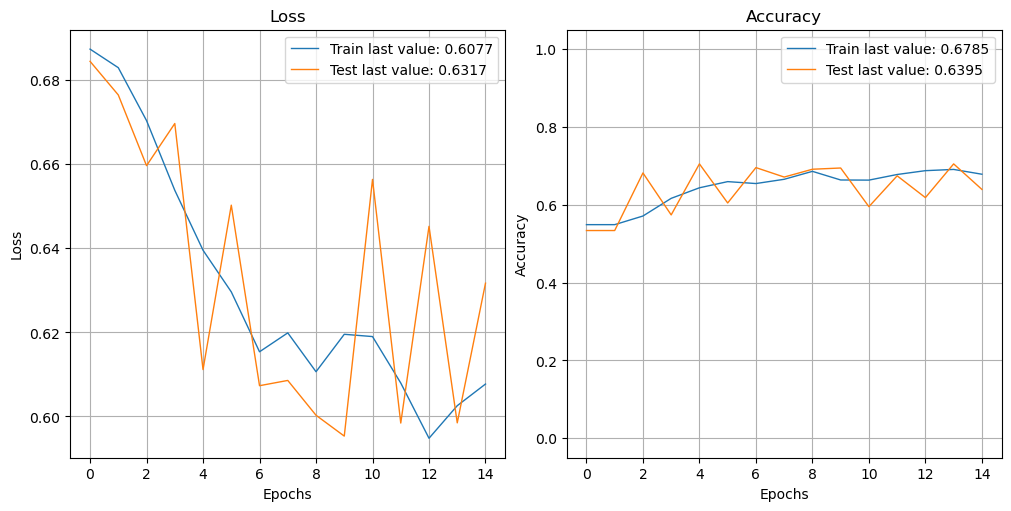

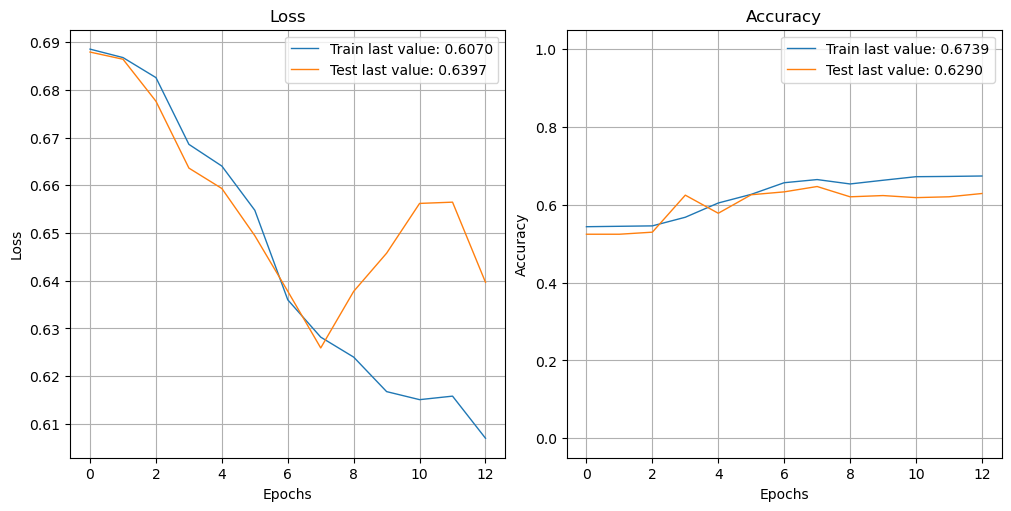

In [9]:
# With tuning
training(
    model=leNet5(images.shape[1],images.shape[3]), 
    train_images=images, 
    train_labels=labels, 
    trainDataGen=trainDataGen, 
    testDataGen=testDataGen,
    tuning=True
)

### CNN custom

Found 4733 files belonging to 2 classes.
The classes name are:['chihuahua', 'muffin']
Number of training batches: 148


100%|████████████████████████████████████████████████████████████████████████████████| 148/148 [00:02<00:00, 50.79it/s]


Shape of train_images: (4733, 128, 128, 3)
Shape of train_labels: (4733,)
You choose CNN_CUSTOM to train without tuning.
Training Fold 1...
Hyper parameters: 1{'units': 64, 'dropout': 0.5, 'learning_rate': 0.001}
Model: "cnn_custom"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                         

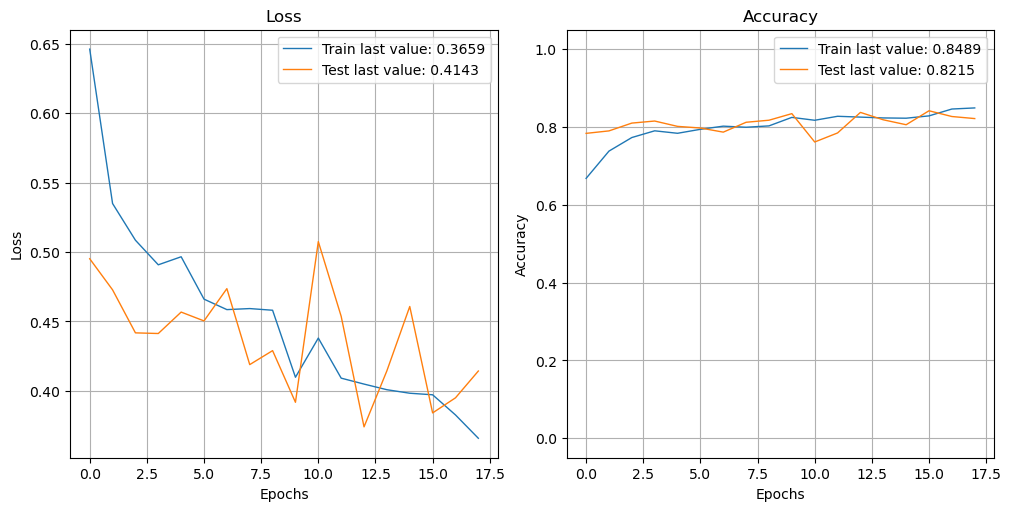

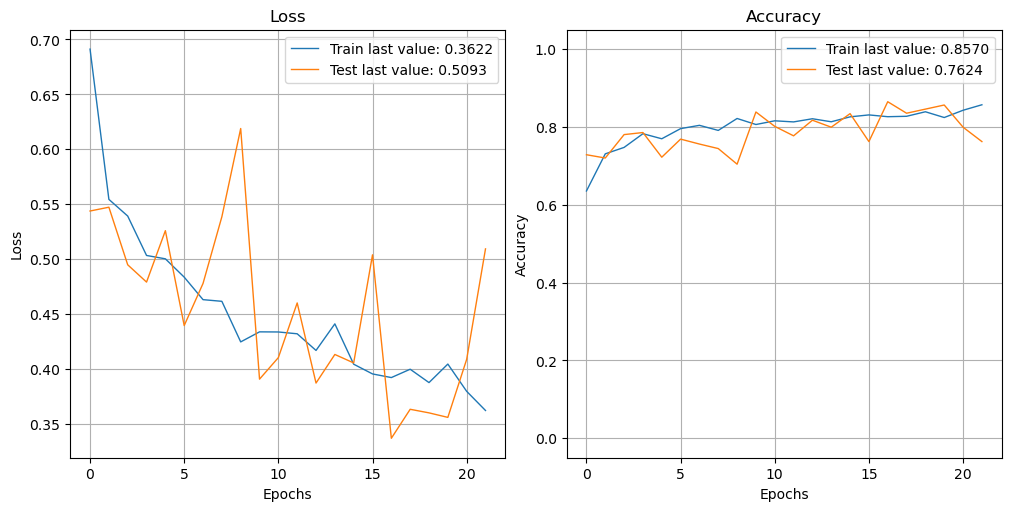

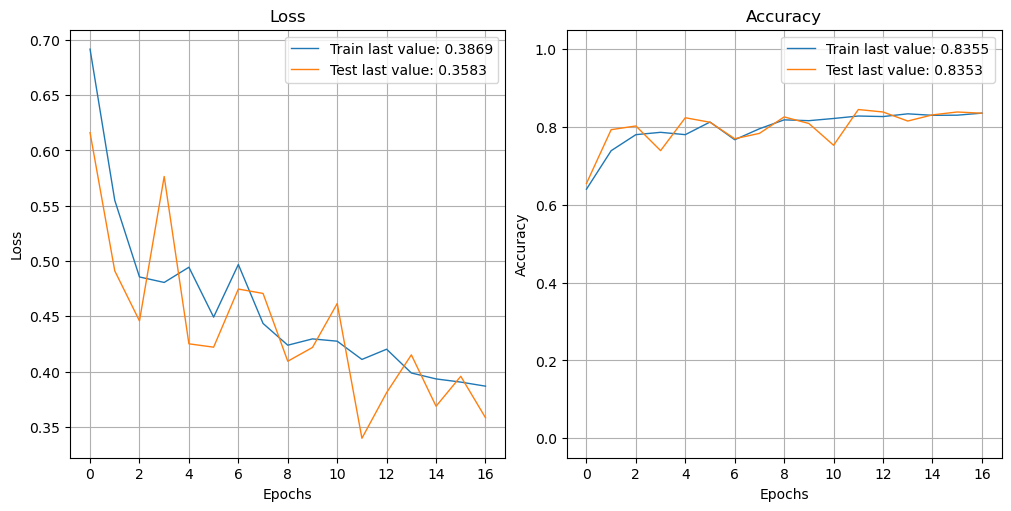

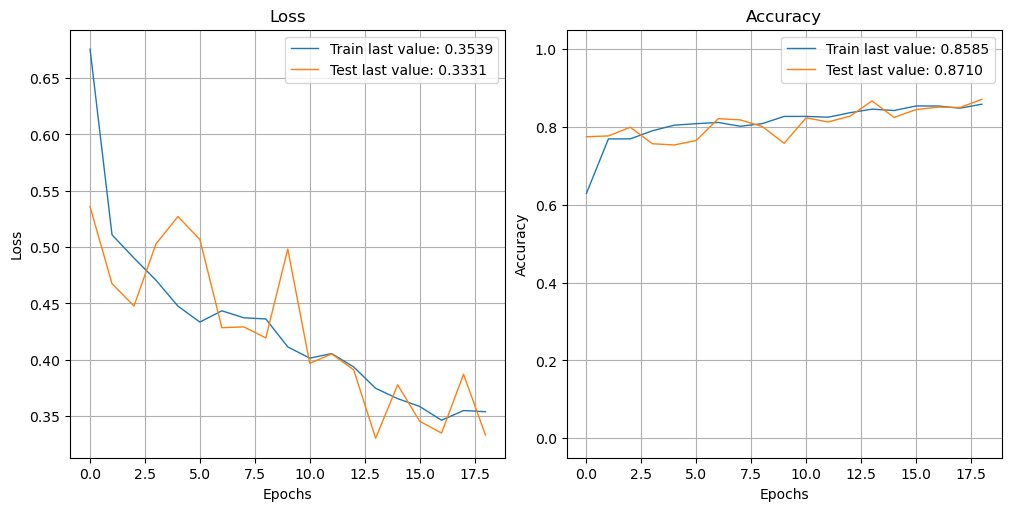

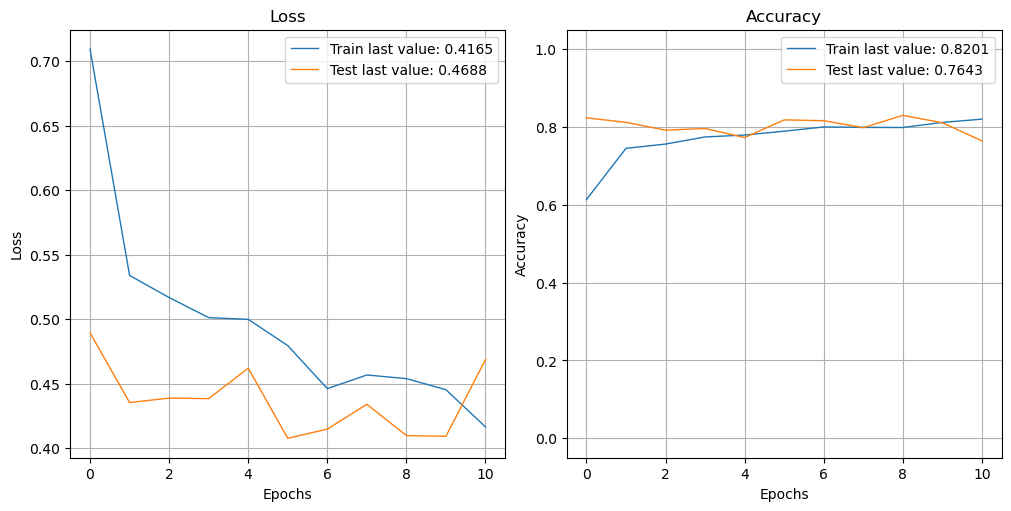

In [10]:
images, labels= import_images(train_dir)

# Without tuning
training(
    model=cnn_custom(images.shape[1],images.shape[3]), 
    train_images=images, 
    train_labels=labels, 
    trainDataGen=trainDataGen, 
    testDataGen=testDataGen
)

Trial 5 Complete [00h 03m 56s]
val_accuracy: 0.8489968180656433

Best val_accuracy So Far: 0.8986272215843201
Total elapsed time: 00h 17m 40s
Hyper parameters: {'units': 128, 'dropout': 0.1, 'learning_rate': 0.0027390906828039592}
Model: "cnn_custom"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                       

95/95 [==============================] - 8s 83ms/step - loss: 0.5624 - accuracy: 0.7345 - val_loss: 0.4970 - val_accuracy: 0.7865
Epoch 7/30
95/95 [==============================] - 9s 99ms/step - loss: 0.5338 - accuracy: 0.7433 - val_loss: 0.4638 - val_accuracy: 0.7939
Epoch 8/30
95/95 [==============================] - 9s 99ms/step - loss: 0.4972 - accuracy: 0.7866 - val_loss: 0.4366 - val_accuracy: 0.8224
Epoch 9/30
95/95 [==============================] - 8s 79ms/step - loss: 0.4867 - accuracy: 0.7799 - val_loss: 0.4543 - val_accuracy: 0.8171
Epoch 10/30
95/95 [==============================] - 8s 80ms/step - loss: 0.5155 - accuracy: 0.7701 - val_loss: 0.5323 - val_accuracy: 0.7410
Epoch 11/30
95/95 [==============================] - 8s 80ms/step - loss: 0.4968 - accuracy: 0.7782 - val_loss: 0.4513 - val_accuracy: 0.8066
Epoch 12/30
95/95 [==============================] - 7s 78ms/step - loss: 0.4974 - accuracy: 0.7743 - val_loss: 0.4417 - val_accuracy: 0.8140
Epoch 13/30
95/95 [==

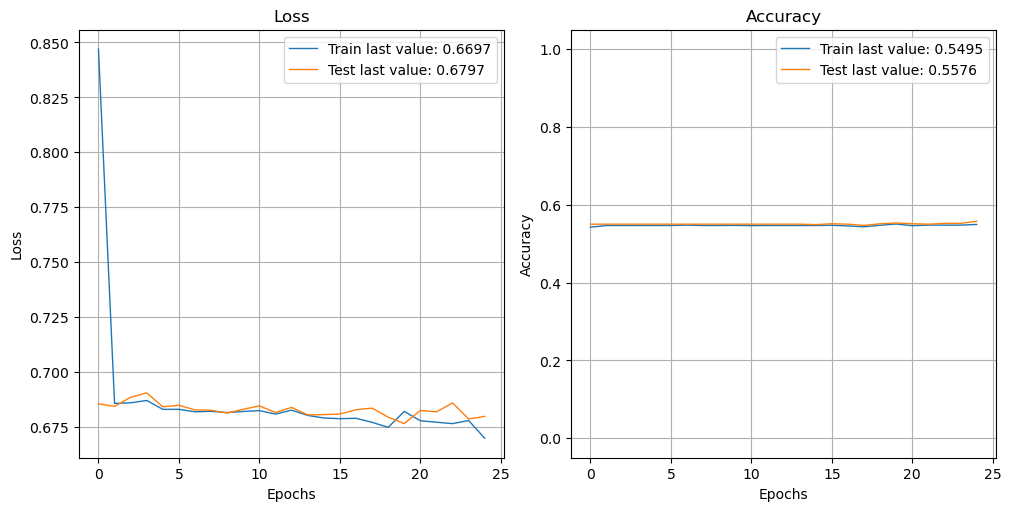

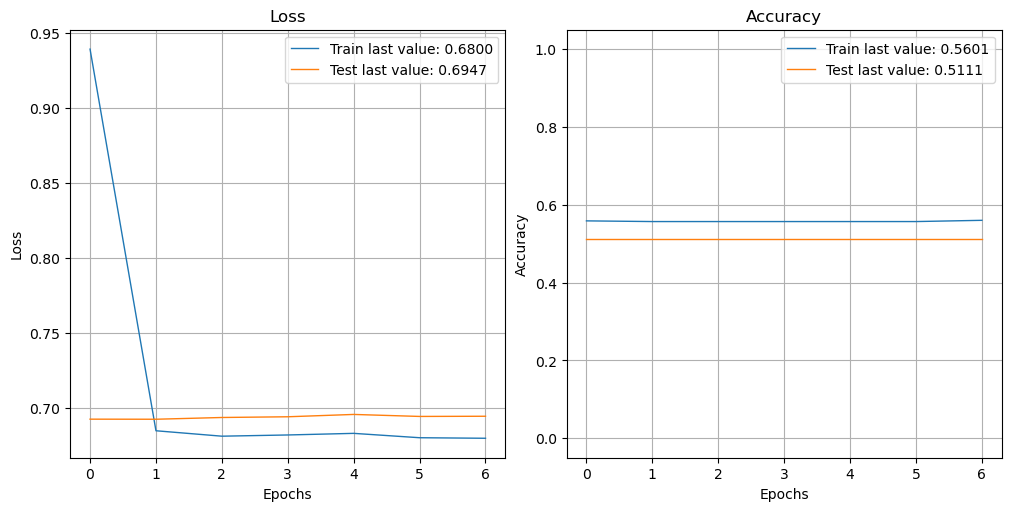

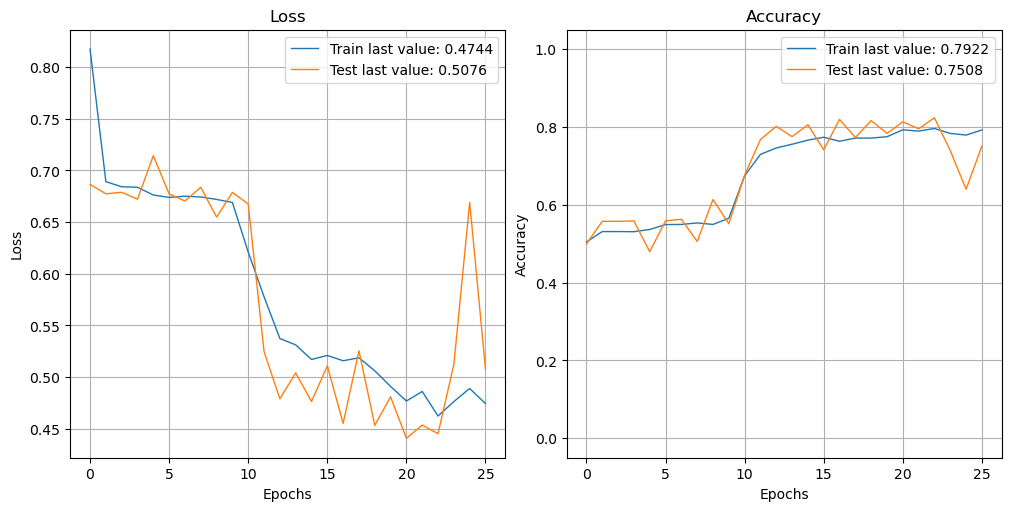

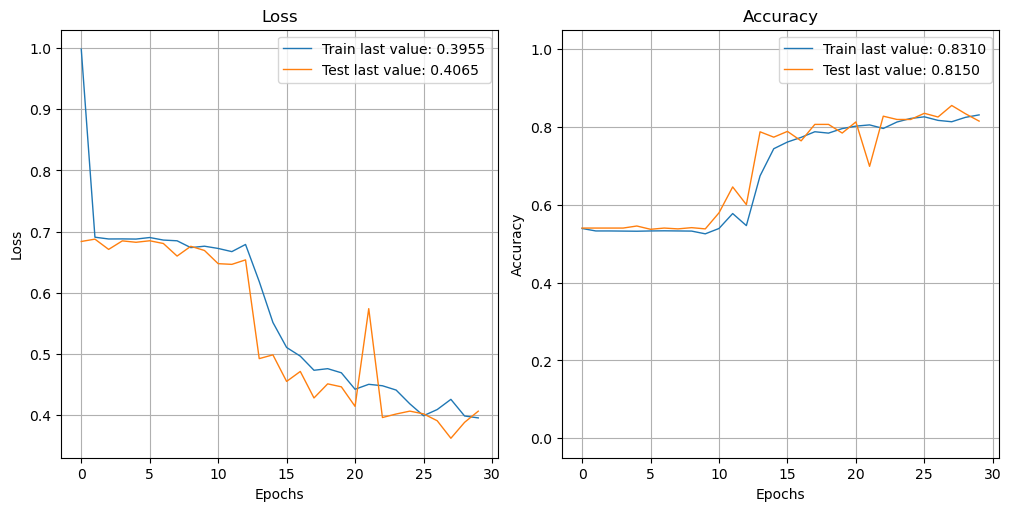

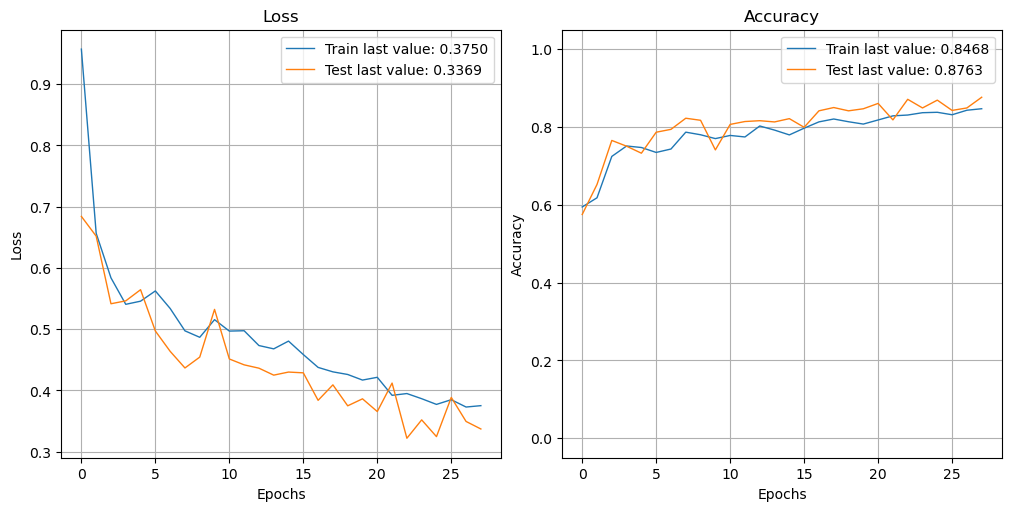

In [11]:
# With tuning
training(
    model=cnn_custom(images.shape[1],images.shape[3]), 
    train_images=images, 
    train_labels=labels, 
    trainDataGen=trainDataGen, 
    testDataGen=testDataGen,
    tuning=True
)